In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from PIL import Image
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pygame
from tqdm import tqdm
from PIL import Image
import os
import warnings
warnings.filterwarnings("ignore")

pygame 2.5.1 (SDL 2.28.2, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class EfficientNetV2(nn.Module):
    def __init__(self):
        super(EfficientNetV2, self).__init__()

        self.MBConv1 = nn.Sequential(
            nn.Conv2d(3, 24, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True),
            nn.Conv2d(24, 24, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True),

        )

        self.MBConv2 = nn.Sequential(
            nn.Conv2d(24, 48, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(48),
            nn.ReLU(inplace=True),
            nn.Conv2d(48, 48, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(48),
            nn.ReLU(inplace=True),

        )

        self.MBConv3 = nn.Sequential(
            nn.Conv2d(48, 64, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
        )

        self.MBConv4 = nn.Sequential(
            nn.Conv2d(64, 96, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(96),
            nn.ReLU(inplace=True),
            nn.Conv2d(96, 96, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(inplace=True),
        )

        self.MBConv5 = nn.Sequential(
            nn.Conv2d(96, 160, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(160),
            nn.ReLU(inplace=True),
            nn.Conv2d(160, 160, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU(inplace=True),
        )

        self.MBConv6 = nn.Sequential(
            nn.Conv2d(160, 256, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
        )

        self.MBConv7 = nn.Sequential(
            nn.Conv2d(256, 1280, kernel_size=3, stride=2,padding=2),
            nn.BatchNorm2d(1280),
            nn.ReLU(inplace=True),
            nn.Conv2d(1280, 1280, kernel_size=3, stride=1,padding=1),
            nn.BatchNorm2d(1280),
            nn.ReLU(inplace=True),
        )

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Linear(1280,50)

    def forward(self, x):
        x = self.MBConv1(x)
        x = self.MBConv2(x)
        x = self.MBConv3(x)
        x = self.MBConv4(x)
        x = self.MBConv5(x)
        x = self.MBConv6(x)
        x = self.MBConv7(x)

        x = self.avg_pool(x)
        x = x.view(-1,1280)
        x = self.classifier(x)

        return x

In [3]:
# Data preprocessing and loading
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_dataset= datasets.ImageFolder(root='Bangla_Dataset/Train',transform=transform)
test_dataset=datasets.ImageFolder(root='Bangla_Dataset/Test',transform=transform)

train_loader= torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader= torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
num_classes = 50
model = EfficientNetV2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# Training loop
train_losses = []
test_losses = []
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    # Wrap train_loader with tqdm for a progress bar
    for i, data in tqdm(enumerate(train_loader, 0), desc=f'Epoch {epoch + 1}/{num_epochs}', total=len(train_loader)):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss = running_loss + loss.item()

    # Calculate and store training loss
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss: .5f}")

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss = test_loss + loss.item()

    # Calculate and store Test loss
            test_loss = test_loss / len(test_loader)
            test_losses.append(test_loss)
    print(f"Epoch {epoch + 1}, Test Loss: {test_loss: .5f}\n")

print("Training finished")


Epoch 1/10: 100%|██████████| 782/782 [15:41<00:00,  1.20s/it]


Epoch 1, Train Loss:  1.34033
Epoch 1, Test Loss:  0.00187



Epoch 2/10: 100%|██████████| 782/782 [15:29<00:00,  1.19s/it]


Epoch 2, Train Loss:  0.45467
Epoch 2, Test Loss:  0.00044



Epoch 3/10: 100%|██████████| 782/782 [15:19<00:00,  1.18s/it]


Epoch 3, Train Loss:  0.31941
Epoch 3, Test Loss:  0.00007



Epoch 4/10: 100%|██████████| 782/782 [15:14<00:00,  1.17s/it]


Epoch 4, Train Loss:  0.24960
Epoch 4, Test Loss:  0.00009



Epoch 5/10: 100%|██████████| 782/782 [15:31<00:00,  1.19s/it]


Epoch 5, Train Loss:  0.19951
Epoch 5, Test Loss:  0.00014



Epoch 6/10: 100%|██████████| 782/782 [15:35<00:00,  1.20s/it]


Epoch 6, Train Loss:  0.16950
Epoch 6, Test Loss:  0.00004



Epoch 7/10: 100%|██████████| 782/782 [15:20<00:00,  1.18s/it]


Epoch 7, Train Loss:  0.14600
Epoch 7, Test Loss:  0.00005



Epoch 8/10: 100%|██████████| 782/782 [16:08<00:00,  1.24s/it]


Epoch 8, Train Loss:  0.12436
Epoch 8, Test Loss:  0.00045



Epoch 9/10: 100%|██████████| 782/782 [16:41<00:00,  1.28s/it]


Epoch 9, Train Loss:  0.11555
Epoch 9, Test Loss:  0.00015



Epoch 10/10: 100%|██████████| 782/782 [17:09<00:00,  1.32s/it]


Epoch 10, Train Loss:  0.09696
Epoch 10, Test Loss:  0.00071

Training finished


In [6]:
# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc='Testing'):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        loss = criterion(outputs, labels)

Testing: 100%|██████████| 235/235 [01:35<00:00,  2.45it/s]


In [7]:
# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f'Overall Accuracy: {accuracy * 100:.2f}%')

Overall Accuracy: 95.52%


In [10]:
# Initialize pygame
pygame.init()

# Set the dimensions of the canvas
canvas_size = (200, 200)

# Set up the canvas
canvas = pygame.display.set_mode(canvas_size)
pygame.display.set_caption("Draw a Character")

# Colors
white = (255, 255, 255)
black = (0, 0, 0)

# Initialize the canvas as white
canvas.fill(white)

drawing = False
last_pos = None

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True
            last_pos = event.pos
        elif event.type == pygame.MOUSEBUTTONUP:
            drawing = False
        elif event.type == pygame.MOUSEMOTION:
            if drawing:
                pygame.draw.line(canvas, black, last_pos, event.pos, 7)
                last_pos = event.pos

    pygame.display.flip()

# Save the image
image_folder = "Bangla_Dataset/SingleImage"
os.makedirs(image_folder, exist_ok=True)
image_path = os.path.join(image_folder, "image.png")
pygame.image.save(canvas, image_path)


image_path = 'Bangla_Dataset/SingleImage/image.png'
img = Image.open(image_path)
img_resized = img.resize((100, 100))
img_resized.save('Bangla_Dataset/SingleImage/image.png')
print("Thank you for your inputed character...!")

pygame.quit()

# Test single image
model.eval()
image_path = 'Bangla_Dataset/SingleImage/image.png'  # Path to your single test image
image = Image.open(image_path).convert('RGB')
image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

with torch.no_grad():
    output = model(image_tensor)
    _, predicted_class = torch.max(output, 1)

# Load class labels
class_labels = train_dataset.classes

# Print predicted class
print(f'Predicted Class: {class_labels[predicted_class.item()]}')

#Print Character
if class_labels[predicted_class.item()] == "Character_1":
    print('prediction : অ')
elif class_labels[predicted_class.item()] == "Character_2":
    print('prediction : আ')
elif class_labels[predicted_class.item()] == "Character_3":
    print('prediction : ই')
elif class_labels[predicted_class.item()] == "Character_4":
    print('prediction : ঈ')
elif class_labels[predicted_class.item()] == "Character_5":
    print('prediction : উ')
elif class_labels[predicted_class.item()] == "Character_6":
    print('prediction : ঊ')
elif class_labels[predicted_class.item()] == "Character_7":
    print('prediction : ঋ')
elif class_labels[predicted_class.item()] == "Character_8":
    print('prediction : এ')
elif class_labels[predicted_class.item()] == "Character_9":
    print('prediction : ঐ')
elif class_labels[predicted_class.item()] == "Character_10":
    print('prediction : ও')
elif class_labels[predicted_class.item()] == "Character_11":
    print('prediction  ঔ')
elif class_labels[predicted_class.item()] == "Character_12":
    print('prediction : ক')
elif class_labels[predicted_class.item()] == "Character_13":
    print('prediction খ')
elif class_labels[predicted_class.item()] == "Character_14":
    print('prediction : গ')
elif class_labels[predicted_class.item()] == "Character_15":
    print('prediction : ঘ')
elif class_labels[predicted_class.item()] == "Character_16":
    print('prediction : ঙ')
elif class_labels[predicted_class.item()] == "Character_17":
    print('prediction : চ')
elif class_labels[predicted_class.item()] == "Character_18":
    print('prediction : ছ')
elif class_labels[predicted_class.item()] == "Character_19":
    print('prediction : জ')
elif class_labels[predicted_class.item()] == "Character_20":
    print('prediction : ঝ')
elif class_labels[predicted_class.item()] == "Character_21":
    print('prediction : ঞ')
elif class_labels[predicted_class.item()] == "Character_22":
    print('prediction : ট')
elif class_labels[predicted_class.item()] == "Character_23":
    print('prediction : ঠ')
elif class_labels[predicted_class.item()] == "Character_24":
    print('prediction : ড')
elif class_labels[predicted_class.item()] == "Character_25":
    print('prediction : ঢ')
elif class_labels[predicted_class.item()] == "Character_26":
    print('prediction : ণ')
elif class_labels[predicted_class.item()] == "Character_27":
    print('prediction : ত')
elif class_labels[predicted_class.item()] == "Character_28":
    print('prediction : থ')
elif class_labels[predicted_class.item()] == "Character_29":
    print('prediction : দ')
elif class_labels[predicted_class.item()] == "Character_30":
    print('prediction : ধ')
elif class_labels[predicted_class.item()] == "Character_31":
    print('prediction : ন')
elif class_labels[predicted_class.item()] == "Character_32":
    print('prediction : প')
elif class_labels[predicted_class.item()] == "Character_33":
    print('prediction : ফ')
elif class_labels[predicted_class.item()] == "Character_34":
    print('prediction : ব')
elif class_labels[predicted_class.item()] == "Character_35":
    print('prediction : ভ')
elif class_labels[predicted_class.item()] == "Character_36":
    print('prediction : ম')
elif class_labels[predicted_class.item()] == "Character_37":
    print('prediction : য')
elif class_labels[predicted_class.item()] == "Character_38":
    print('prediction : র')
elif class_labels[predicted_class.item()] == "Character_39":
    print('prediction : ল')
elif class_labels[predicted_class.item()] == "Character_40":
    print('prediction : শ')
elif class_labels[predicted_class.item()] == "Character_41":
    print('prediction : ষ')
elif class_labels[predicted_class.item()] == "Character_42":
    print('prediction : স')
elif class_labels[predicted_class.item()] == "Character_43":
    print('prediction : হ')
elif class_labels[predicted_class.item()] == "Character_44":
    print('prediction : ড়')
elif class_labels[predicted_class.item()] == "Character_45":
    print('prediction : ঢ়')
elif class_labels[predicted_class.item()] == "Character_46":
    print('prediction : য়')
elif class_labels[predicted_class.item()] == "Character_47":
    print('prediction : ৎ')
elif class_labels[predicted_class.item()] == "Character_48":
    print('prediction : ং')
elif class_labels[predicted_class.item()] == "Character_49":
    print('prediction : ঃ')
elif class_labels[predicted_class.item()] == "Character_50":
    print('prediction :  ঁ')
else:
    print('prediction : No Match')

Thank you for your inputed character...!
Predicted Class: Character_48
prediction : ং


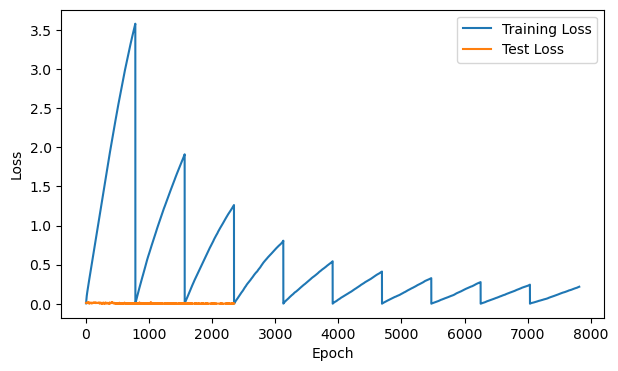

In [9]:
plt.figure(figsize=(7, 4))
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
batch_sizes = [8,16,32]
batch_size_train_losses = {}
batch_size_test_losses = {}
batch_size_overall_accuracies = {}

for batch_size in batch_sizes:
    # Set up DataLoader for train dataset
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model = EfficientNetV2()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []
    overall_accuracies = []

    num_epochs = 5

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        model.train()

        for i, data in tqdm(enumerate(train_loader, 0), desc=f'Epoch {epoch + 1}/{num_epochs}', total=len(train_loader)):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        print(f"Epoch {epoch + 1}, Train Loss: {train_loss: .3f}")

        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data in test_loader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_loss= test_loss / len(test_loader)
        test_losses.append(test_loss)
        print(f"Epoch {epoch + 1}, Test Loss: {test_loss: .5f}\n")

        # Calculate overall accuracy
        overall_accuracy = ((correct_train + correct_test) / (total_train + total_test))*100
        overall_accuracies.append(overall_accuracy)

        print(f"Epoch {epoch + 1}, Overall Accuracy: {overall_accuracy:.2f}%")

    batch_size_train_losses[batch_size] = train_losses
    batch_size_test_losses[batch_size] = test_losses
    batch_size_overall_accuracies[batch_size] = overall_accuracies

Epoch 1/5: 100%|██████████| 3125/3125 [23:29<00:00,  2.22it/s]


Epoch 1, Train Loss:  2.659
Epoch 1, Test Loss:  1.34917

Epoch 1, Overall Accuracy: 29.21%


Epoch 2/5: 100%|██████████| 3125/3125 [22:32<00:00,  2.31it/s] 


Epoch 2, Train Loss:  1.057
Epoch 2, Test Loss:  0.57256

Epoch 2, Overall Accuracy: 69.71%


Epoch 3/5: 100%|██████████| 3125/3125 [22:17<00:00,  2.34it/s]


Epoch 3, Train Loss:  0.592
Epoch 3, Test Loss:  0.40175

Epoch 3, Overall Accuracy: 83.40%


Epoch 4/5: 100%|██████████| 3125/3125 [22:26<00:00,  2.32it/s]


Epoch 4, Train Loss:  0.428
Epoch 4, Test Loss:  0.31752

Epoch 4, Overall Accuracy: 88.39%


Epoch 5/5: 100%|██████████| 3125/3125 [22:29<00:00,  2.32it/s]


Epoch 5, Train Loss:  0.334
Epoch 5, Test Loss:  0.29052

Epoch 5, Overall Accuracy: 90.81%


Epoch 1/5: 100%|██████████| 1563/1563 [16:07<00:00,  1.62it/s]


Epoch 1, Train Loss:  2.406
Epoch 1, Test Loss:  1.36987

Epoch 1, Overall Accuracy: 34.56%


Epoch 2/5: 100%|██████████| 1563/1563 [15:56<00:00,  1.63it/s]


Epoch 2, Train Loss:  0.971
Epoch 2, Test Loss:  0.59105

Epoch 2, Overall Accuracy: 71.35%


Epoch 3/5: 100%|██████████| 1563/1563 [16:26<00:00,  1.58it/s]


Epoch 3, Train Loss:  0.553
Epoch 3, Test Loss:  0.41464

Epoch 3, Overall Accuracy: 84.39%


Epoch 4/5: 100%|██████████| 1563/1563 [16:27<00:00,  1.58it/s]


Epoch 4, Train Loss:  0.396
Epoch 4, Test Loss:  0.42837

Epoch 4, Overall Accuracy: 88.39%


Epoch 5/5: 100%|██████████| 1563/1563 [16:46<00:00,  1.55it/s]


Epoch 5, Train Loss:  0.320
Epoch 5, Test Loss:  0.29554

Epoch 5, Overall Accuracy: 91.19%


Epoch 1/5: 100%|██████████| 782/782 [13:22<00:00,  1.03s/it]


Epoch 1, Train Loss:  2.163
Epoch 1, Test Loss:  1.50385

Epoch 1, Overall Accuracy: 38.13%


Epoch 2/5: 100%|██████████| 782/782 [13:17<00:00,  1.02s/it]


Epoch 2, Train Loss:  0.848
Epoch 2, Test Loss:  0.52804

Epoch 2, Overall Accuracy: 76.03%


Epoch 3/5: 100%|██████████| 782/782 [13:12<00:00,  1.01s/it]


Epoch 3, Train Loss:  0.522
Epoch 3, Test Loss:  0.39379

Epoch 3, Overall Accuracy: 85.44%


Epoch 4/5: 100%|██████████| 782/782 [13:09<00:00,  1.01s/it]


Epoch 4, Train Loss:  0.392
Epoch 4, Test Loss:  0.39761

Epoch 4, Overall Accuracy: 88.37%


Epoch 5/5: 100%|██████████| 782/782 [13:56<00:00,  1.07s/it]


Epoch 5, Train Loss:  0.318
Epoch 5, Test Loss:  0.30230

Epoch 5, Overall Accuracy: 91.04%


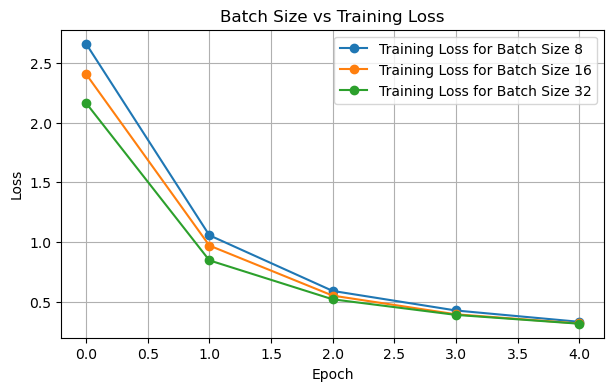

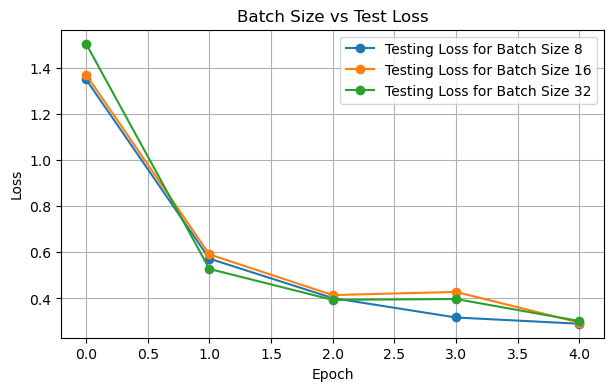

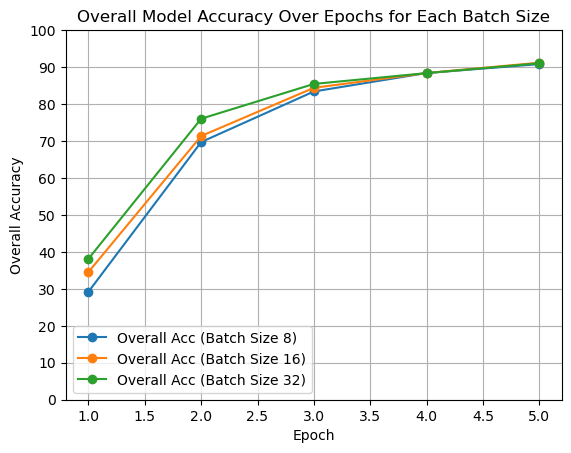

In [70]:
# Plot batch size vs Train loss graph
plt.figure(figsize=(7, 4))
for batch_size in batch_sizes:
    plt.plot(batch_size_train_losses[batch_size], label=f"Training Loss for Batch Size {batch_size}",marker='o')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("Batch Size vs Training Loss")
plt.show()

# Plot batch size vs Test loss graph
plt.figure(figsize=(7, 4))
for batch_size in batch_sizes:
    plt.plot(batch_size_test_losses[batch_size], label=f"Testing Loss for Batch Size {batch_size}",marker='o')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("Batch Size vs Test Loss")
plt.show()

# Plotting overall accuracy for each batch size
for batch_size in batch_sizes:
    overall_accuracies = batch_size_overall_accuracies[batch_size]
    plt.plot(range(1, num_epochs + 1), overall_accuracies, label=f'Overall Acc (Batch Size {batch_size})', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Overall Accuracy')
plt.title('Overall Model Accuracy Over Epochs for Each Batch Size')
plt.legend()
plt.grid(True)
plt.yticks(range(0, 101, 10))
plt.show()


In [12]:
learning_rates = [0.001, 0.01, 0.1]
lr_train_losses = {}
lr_test_losses = {}
lr_overall_accuracies = {}

for learning_rate in learning_rates:
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    test_losses =[]
    overall_accuracies = []
    num_epochs= 5
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        model.train()
        for i, data in tqdm(enumerate(train_loader, 0), desc=f'Epoch {epoch + 1}/{num_epochs}', total=len(train_loader)):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss = running_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        print(f"Epoch {epoch + 1}, Train Loss: {running_loss / len(train_loader): .5f}")

        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data in test_loader:
                inputs, labels = data
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss=test_loss+loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        # Calculate and store Test loss
        test_loss= test_loss/len(test_loader)
        test_losses.append(test_loss)
        print(f"Epoch {epoch + 1}, Test Loss: {test_loss: .5f}\n")

        overall_accuracy = ((correct_train + correct_test) / (total_train + total_test))*100
        overall_accuracies.append(overall_accuracy)

        print(f"Epoch {epoch + 1}, Overall Accuracy: {overall_accuracy:.2f}%")

    lr_train_losses[learning_rate] = train_losses
    lr_test_losses[learning_rate] = test_losses
    lr_overall_accuracies[learning_rate] = overall_accuracies

Epoch 1/5: 100%|██████████| 782/782 [13:26<00:00,  1.03s/it]


Epoch 1, Train Loss:  0.28481
Epoch 1, Test Loss:  0.31354

Epoch 1, Overall Accuracy: 91.80%


Epoch 2/5: 100%|██████████| 782/782 [12:49<00:00,  1.02it/s]


Epoch 2, Train Loss:  0.23131
Epoch 2, Test Loss:  0.25919

Epoch 2, Overall Accuracy: 93.45%


Epoch 3/5: 100%|██████████| 782/782 [13:23<00:00,  1.03s/it]


Epoch 3, Train Loss:  0.18680
Epoch 3, Test Loss:  0.29147

Epoch 3, Overall Accuracy: 94.15%


Epoch 4/5: 100%|██████████| 782/782 [14:14<00:00,  1.09s/it]


Epoch 4, Train Loss:  0.16160
Epoch 4, Test Loss:  0.27022

Epoch 4, Overall Accuracy: 94.73%


Epoch 5/5: 100%|██████████| 782/782 [14:25<00:00,  1.11s/it]


Epoch 5, Train Loss:  0.15110
Epoch 5, Test Loss:  0.24646

Epoch 5, Overall Accuracy: 95.29%


Epoch 1/5: 100%|██████████| 782/782 [14:05<00:00,  1.08s/it]


Epoch 1, Train Loss:  0.72236
Epoch 1, Test Loss:  0.59606

Epoch 1, Overall Accuracy: 80.45%


Epoch 2/5: 100%|██████████| 782/782 [13:35<00:00,  1.04s/it]


Epoch 2, Train Loss:  0.40957
Epoch 2, Test Loss:  0.54459

Epoch 2, Overall Accuracy: 87.88%


Epoch 3/5: 100%|██████████| 782/782 [13:42<00:00,  1.05s/it]


Epoch 3, Train Loss:  0.33032
Epoch 3, Test Loss:  0.32441

Epoch 3, Overall Accuracy: 90.90%


Epoch 4/5: 100%|██████████| 782/782 [13:33<00:00,  1.04s/it]


Epoch 4, Train Loss:  0.26368
Epoch 4, Test Loss:  0.33027

Epoch 4, Overall Accuracy: 92.47%


Epoch 5/5: 100%|██████████| 782/782 [13:26<00:00,  1.03s/it]


Epoch 5, Train Loss:  0.23861
Epoch 5, Test Loss:  0.30771

Epoch 5, Overall Accuracy: 93.00%


Epoch 1/5: 100%|██████████| 782/782 [13:19<00:00,  1.02s/it]


Epoch 1, Train Loss:  1.34799
Epoch 1, Test Loss:  0.74132

Epoch 1, Overall Accuracy: 63.50%


Epoch 2/5: 100%|██████████| 782/782 [13:46<00:00,  1.06s/it]


Epoch 2, Train Loss:  0.67524
Epoch 2, Test Loss:  0.63108

Epoch 2, Overall Accuracy: 80.59%


Epoch 3/5: 100%|██████████| 782/782 [13:49<00:00,  1.06s/it]


Epoch 3, Train Loss:  0.51020
Epoch 3, Test Loss:  0.49711

Epoch 3, Overall Accuracy: 86.13%


Epoch 4/5: 100%|██████████| 782/782 [14:15<00:00,  1.09s/it]


Epoch 4, Train Loss:  0.44675
Epoch 4, Test Loss:  0.30242

Epoch 4, Overall Accuracy: 88.66%


Epoch 5/5: 100%|██████████| 782/782 [13:39<00:00,  1.05s/it]


Epoch 5, Train Loss:  0.32702
Epoch 5, Test Loss:  0.34867

Epoch 5, Overall Accuracy: 91.25%


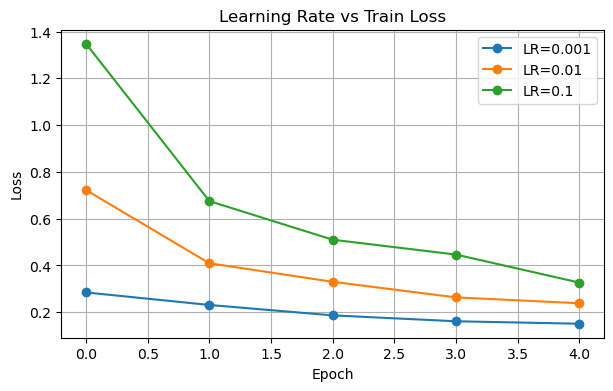

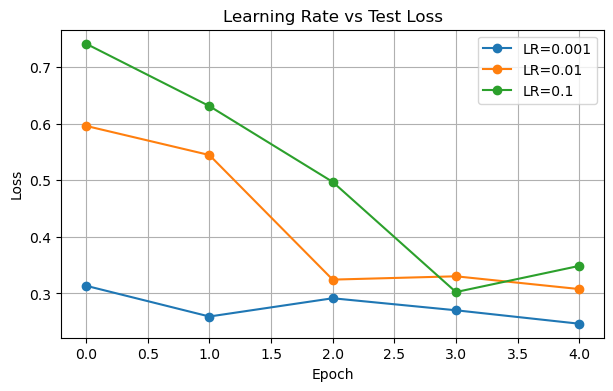

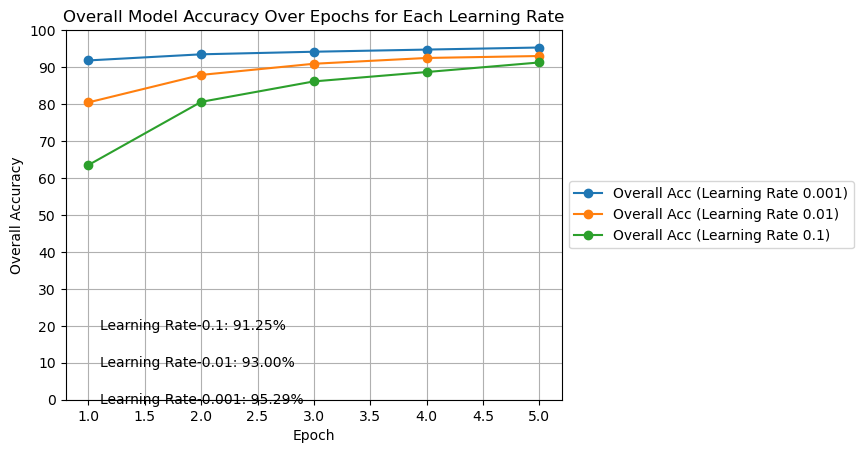

In [64]:
# Plot learning rate vs loss graph
plt.figure(figsize=(7, 4))
for learning_rate in learning_rates:
    plt.plot(lr_train_losses[learning_rate], label=f"LR={learning_rate}",marker='o')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("Learning Rate vs Train Loss")
plt.show()

# Plot learning rate vs loss graph
plt.figure(figsize=(7, 4))
for learning_rate in learning_rates:
    plt.plot(lr_test_losses[learning_rate], label=f"LR={learning_rate}",marker='o')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("Learning Rate vs Test Loss")
plt.show()

# Plotting overall accuracy for each learning rate
label_x, label_y = max(learning_rates) + 1, 0

for learning_rate in learning_rates:
    overall_accuracies = lr_overall_accuracies[learning_rate ]
    plt.plot(range(1, num_epochs + 1), overall_accuracies, label=f'Overall Acc (Learning Rate {learning_rate})', marker='o')
    plt.text(label_x, label_y, f'Learning Rate-{learning_rate}: {overall_accuracies[-1]:.2f}%', ha='left', va='center', color='black')
    label_y += 10
plt.xlabel('Epoch')
plt.ylabel('Overall Accuracy')
plt.title('Overall Model Accuracy Over Epochs for Each Learning Rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.yticks(range(0, 101, 10))
plt.show()

In [14]:
epoch_sizes = [5,10]
epoch_train_losses = {}
epoch_test_losses = {}
epoch_overall_accuracies = {}

for epoch_size in epoch_sizes:
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses =[]
    overall_accuracies = []
    for epoch in range(epoch_size):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        model.train()
        for i, data in tqdm(enumerate(train_loader, 0), desc=f'Epoch {epoch + 1}/{epoch_size}', total=len(train_loader)):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss = running_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        print(f"Epoch {epoch + 1}, Train Loss: {running_loss / len(train_loader): .5f}")

        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for data in test_loader:
                inputs, labels = data
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss=test_loss+loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        # Calculate and store Test loss
        test_loss= test_loss/len(test_loader)
        test_losses.append(test_loss)
        print(f"Epoch {epoch + 1}, Test Loss: {test_loss: .5f}\n")
        overall_accuracy = ((correct_train + correct_test) / (total_train + total_test))*100
        overall_accuracies.append(overall_accuracy)

        print(f"Epoch {epoch + 1}, Overall Accuracy: {overall_accuracy:.2f}%")

    epoch_train_losses[epoch_size] = train_losses
    epoch_test_losses[epoch_size] = test_losses
    epoch_overall_accuracies[epoch_size]= overall_accuracies

Epoch 1/5: 100%|██████████| 782/782 [13:59<00:00,  1.07s/it]


Epoch 1, Train Loss:  0.17537
Epoch 1, Test Loss:  0.22236

Epoch 1, Overall Accuracy: 94.91%


Epoch 2/5: 100%|██████████| 782/782 [13:44<00:00,  1.05s/it]


Epoch 2, Train Loss:  0.13136
Epoch 2, Test Loss:  0.21403

Epoch 2, Overall Accuracy: 95.95%


Epoch 3/5: 100%|██████████| 782/782 [13:32<00:00,  1.04s/it]


Epoch 3, Train Loss:  0.12254
Epoch 3, Test Loss:  0.20771

Epoch 3, Overall Accuracy: 96.23%


Epoch 4/5: 100%|██████████| 782/782 [13:23<00:00,  1.03s/it]


Epoch 4, Train Loss:  0.10908
Epoch 4, Test Loss:  0.20015

Epoch 4, Overall Accuracy: 96.51%


Epoch 5/5: 100%|██████████| 782/782 [13:25<00:00,  1.03s/it]


Epoch 5, Train Loss:  0.10375
Epoch 5, Test Loss:  0.19541

Epoch 5, Overall Accuracy: 96.77%


Epoch 1/10: 100%|██████████| 782/782 [13:42<00:00,  1.05s/it]


Epoch 1, Train Loss:  0.09833
Epoch 1, Test Loss:  0.19284

Epoch 1, Overall Accuracy: 96.84%


Epoch 2/10: 100%|██████████| 782/782 [13:42<00:00,  1.05s/it]


Epoch 2, Train Loss:  0.09037
Epoch 2, Test Loss:  0.18646

Epoch 2, Overall Accuracy: 97.04%


Epoch 3/10: 100%|██████████| 782/782 [13:27<00:00,  1.03s/it]


Epoch 3, Train Loss:  0.08287
Epoch 3, Test Loss:  0.18615

Epoch 3, Overall Accuracy: 97.22%


Epoch 4/10: 100%|██████████| 782/782 [13:22<00:00,  1.03s/it]


Epoch 4, Train Loss:  0.08351
Epoch 4, Test Loss:  0.18654

Epoch 4, Overall Accuracy: 97.28%


Epoch 5/10: 100%|██████████| 782/782 [13:21<00:00,  1.03s/it]


Epoch 5, Train Loss:  0.07575
Epoch 5, Test Loss:  0.18387

Epoch 5, Overall Accuracy: 97.41%


Epoch 6/10: 100%|██████████| 782/782 [13:45<00:00,  1.06s/it]


Epoch 6, Train Loss:  0.07427
Epoch 6, Test Loss:  0.18321

Epoch 6, Overall Accuracy: 97.37%


Epoch 7/10: 100%|██████████| 782/782 [13:23<00:00,  1.03s/it]


Epoch 7, Train Loss:  0.07007
Epoch 7, Test Loss:  0.18104

Epoch 7, Overall Accuracy: 97.53%


Epoch 8/10: 100%|██████████| 782/782 [13:35<00:00,  1.04s/it]


Epoch 8, Train Loss:  0.06869
Epoch 8, Test Loss:  0.18434

Epoch 8, Overall Accuracy: 97.75%


Epoch 9/10: 100%|██████████| 782/782 [13:32<00:00,  1.04s/it]


Epoch 9, Train Loss:  0.06990
Epoch 9, Test Loss:  0.18674

Epoch 9, Overall Accuracy: 97.60%


Epoch 10/10: 100%|██████████| 782/782 [13:31<00:00,  1.04s/it]


Epoch 10, Train Loss:  0.06253
Epoch 10, Test Loss:  0.18136

Epoch 10, Overall Accuracy: 97.74%


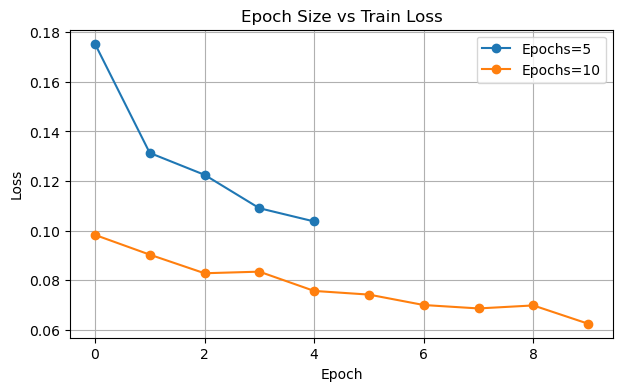

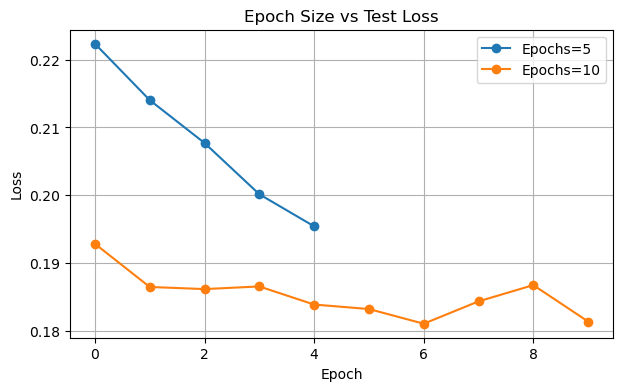

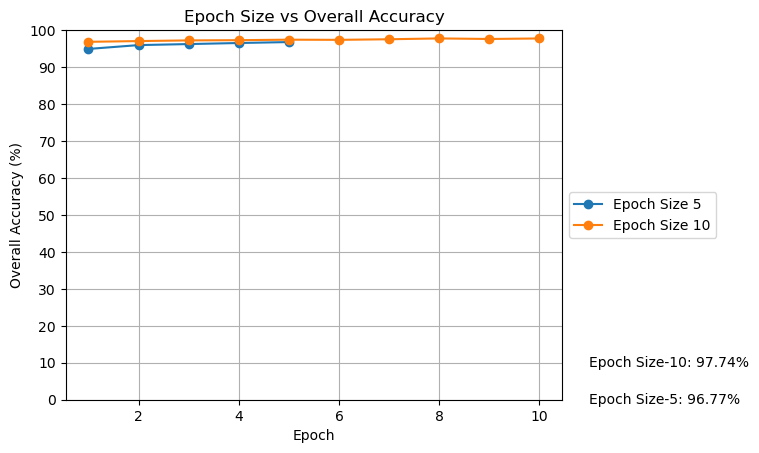

In [46]:
# Plot epoch size vs loss graph
plt.figure(figsize=(7, 4))
for epoch_size in epoch_sizes:
    plt.plot(epoch_train_losses[epoch_size], label=f"Epochs={epoch_size}",marker='o')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("Epoch Size vs Train Loss")
plt.show()

# Plot epoch size vs loss graph
plt.figure(figsize=(7, 4))
for epoch_size in epoch_sizes:
    plt.plot(epoch_test_losses[epoch_size], label=f"Epochs={epoch_size}",marker='o')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("Epoch Size vs Test Loss")
plt.show()

# Plotting epoch size vs overall accuracy
label_x, label_y = max(epoch_sizes) + 1, 0
for epoch_size in epoch_sizes:
    overall_accuracies = epoch_overall_accuracies[epoch_size]
    plt.plot(range(1, epoch_size + 1), overall_accuracies, label=f'Epoch Size {epoch_size}', marker='o')
    plt.text(label_x, label_y, f'Epoch Size-{epoch_size}: {overall_accuracies[-1]:.2f}%', ha='left', va='center', color='black')
    label_y += 10

plt.xlabel('Epoch')
plt.ylabel('Overall Accuracy (%)')
plt.title('Epoch Size vs Overall Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.yticks(range(0, 101, 10))
plt.show()